# AVIATION ACCIDENT ANALYSIS

## Business Understanding

### Project Goal
The objective of this project is to provide data-driven insights to support our company’s strategic expansion into the aviation sector. Using historical aviation accident data, we aim to identify aircraft models, manufacturers, or operational characteristics associated with lower risk profiles. These insights will inform purchasing decisions for both commercial and private aviation operations, helping the company enter this market with a strong understanding of operational safety and associated risks.

### Stakeholder
The primary stakeholder is the head of the company’s new aviation division. This individual is responsible for assessing investment opportunities, mitigating operational risks, and selecting aircraft for acquisition. While technically proficient in business strategy, the stakeholder may not have a background in data science or aviation analytics. Therefore, our deliverables must translate complex data into clear, actionable insights that directly support business decisions.

### Business Context
As the company looks to diversify its portfolio, the aviation industry presents both high potential and high risk. Aircraft safety, reliability, and accident history are crucial factors in evaluating which aircraft will provide the best return on investment with the lowest liability. Entering this space without understanding aviation risks could expose the company to avoidable costs, reputational damage, and operational setbacks.

This project seeks to reduce that uncertainty by analyzing over 60 years of aviation accident data, surfacing patterns and trends that can guide strategic decisions.

### Core Business Questions
To ensure the analysis aligns with business goals, we are focusing on the following key questions:

- **Which aircraft manufacturers and models have the lowest accident rates?**
- **What operational or environmental factors (e.g., location, weather, time of day) correlate with increased risk?**
- **How have accident trends evolved over time, and what insights can be drawn for future planning?**
- **What recommendations can be made to prioritize safety and reliability in aircraft purchasing decisions?**

By answering these questions, this project will deliver three concrete business recommendations tailored to the needs of the aviation division, helping guide safe and strategic market entry.


##  Data Understanding

The dataset, sourced from the National Transportation Safety Board (NTSB), provides a comprehensive record of civil aviation accidents and selected incidents from 1962 through early 2023. This extensive temporal coverage gives us a longitudinal view of aviation safety trends across decades and allows for the identification of patterns in aircraft incidents and risks over time.

After initial inspection, the dataset contains **89 columns** and over **93,000 rows**, capturing a wide range of variables—from basic metadata like event IDs and dates to highly specific details such as aircraft engine types, damage extent, flight phases, and weather conditions.

Key observations from the initial data exploration include:

- **Missing Data**: Several columns contain a significant proportion of missing values. For instance, narrative fields like `weather_condition`, `injury_severity`, and `aircraft_damage` are sparsely populated in certain years. These will require careful imputation or exclusion based on relevance and completeness.
- **Data Types**: Most fields are strings or categorical variables. Columns such as `injury_severity`, `aircraft_damage`, and `aircraft_category` will benefit from encoding for analysis.
- **Irrelevant Columns**: Several columns (e.g., `investigation_type`, `report_status`, `publication_date`) may not be necessary for addressing the business problem and could be dropped to streamline analysis.
- **Duplicate & Redundant Data**: Columns such as `make`, `model`, and `aircraft_serial_number` may appear redundant depending on the level of aggregation. Deduplication may be required after confirming their unique combinations.

This understanding forms the foundation for strategic data preparation and business-focused insights. Our next step is to clean and prepare the dataset to identify which aircraft types, conditions, and flight characteristics correlate most strongly with lower incident severity and frequency.


In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset with alternative encoding
file_path = 'data/AviationData.csv'
df = pd.read_csv(file_path, encoding='latin1')

# View the shape of the dataset
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

# Display the first 5 rows of the dataset
df.head()

Dataset contains 88,889 rows and 31 columns.


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation
The goal here is to prepare a high-quality dataset that enables effective business analysis and modeling. Based on our earlier data understanding, we'll focus on the following key tasks:

### Drop Irrelevant Columns

These are metadata or administrative fields that don't contribute to understanding accident patterns.

In [8]:
irrelevant_cols = [
    'investigation_type', 'report_status', 'publication_date',
    'airport_name', 'airport_code', 'latitude', 'longitude',
    'event_id', 'registration_number', 'aircraft_serial_number'
]

df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')


### Handle Missing Values

We’ll start by checking the percentage of missing data per column and drop columns that are largely empty or irrelevant.

In [9]:
# Display missing data percentage
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent.head(20))

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
dtype: float64


In [10]:
threshold = 0.7  # 70%
df = df.loc[:, df.isnull().mean() < threshold]

### Standardize Categorical Columns

 Convert text fields to lowercase and strip spaces to prepare for encoding.

In [12]:
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].apply(lambda col: col.str.lower().str.strip())

### Convert Dates and Extract Features

Convert the event_date into datetime format and extract useful features like year and month.

In [16]:
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [18]:
# Convert 'Event.Date' to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year and month from the date
df['event_year'] = df['Event.Date'].dt.year
df['event_month'] = df['Event.Date'].dt.month

### Encode Target and Important Features

For analysis and modeling, we’ll encode key categorical variables:

In [20]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Injury.Severity', 'Aircraft.damage', 'Aircraft.Category']

le = LabelEncoder()
for col in label_cols:
    if df[col].notnull().sum() > 0:
        df[col] = le.fit_transform(df[col].astype(str))

### Final Check

Verifying the shape, datatypes, and null values:

In [21]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum().sort_values(ascending=False).head(10))

(88889, 31)
Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                    int32
Aircraft.damage                    int32
Aircraft.Category                  int32
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Tota

## Exploratory Data Analysis

Identifying factors that correlate with lower incident severity and frequency

### Incident Severity Distribution

How often do different levels of severity occur?

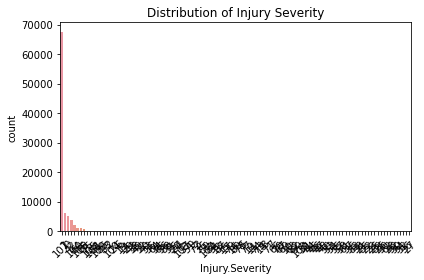

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Injury Severity
sns.countplot(data=df, x='Injury.Severity', order=df['Injury.Severity'].value_counts().index)
plt.title('Distribution of Injury Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top Aircraft Makes in Incidents

Which aircraft brands are most frequently involved?

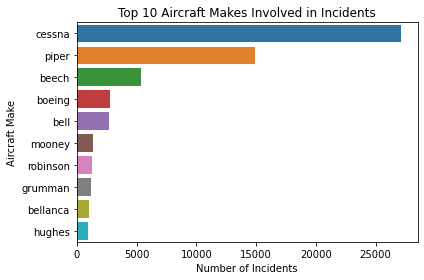

In [23]:
top_makes = df['Make'].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Aircraft Makes Involved in Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Make')
plt.tight_layout()
plt.show()

### Severity by Flight Purpose

Is there a relationship between flight purpose (e.g., personal, commercial) and injury severity?

<ipython-input-28-535bef3a8e9c>:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


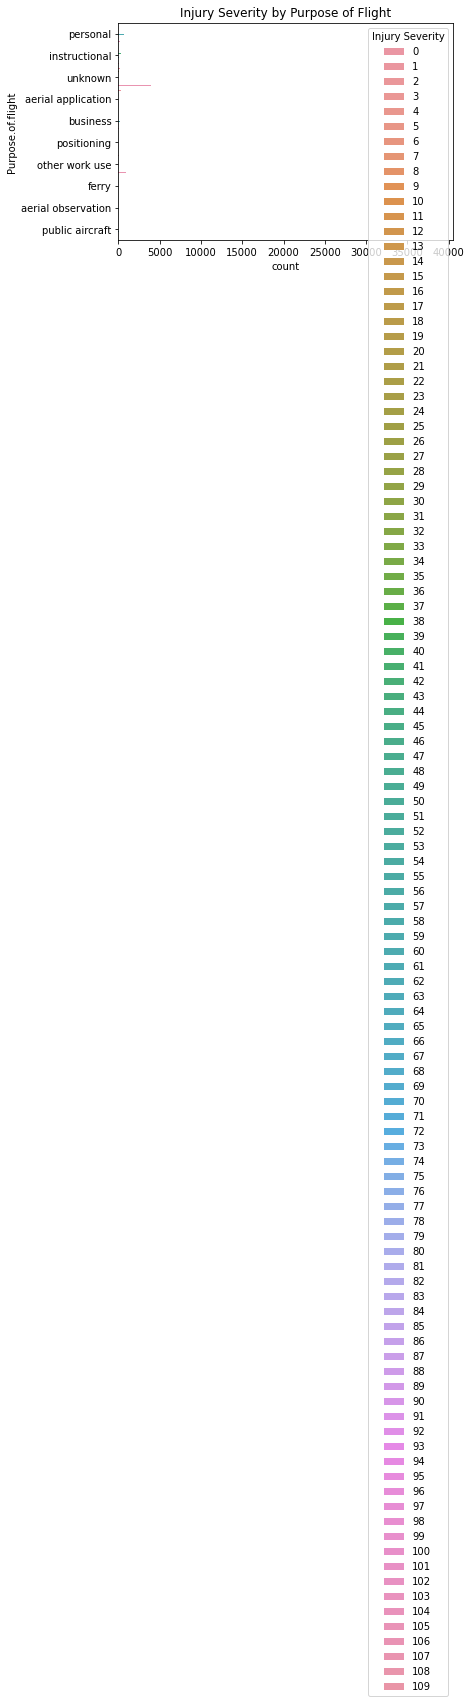

In [28]:
sns.countplot(data=df, y='Purpose.of.flight', hue='Injury.Severity', order=df['Purpose.of.flight'].value_counts().index[:10])
plt.title('Injury Severity by Purpose of Flight')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()
